In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [3]:
HYCB = pd.read_csv('D:\download\HYCB.csv')
data = pd.DataFrame (HYCB)

In [4]:
print(HYCB.head())
print(HYCB.tail())
summary = HYCB.describe()
print(summary)

       CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped bond_type  Client_Trade_Percentage weekly_mean_volume  \
0         0.292359    

In [5]:
nrow= len(data.index)
ncol= len(data.columns)
print("Number of Rows of Data =" , nrow, '\n')
print("Number of Columns of Data =" ,ncol)

Number of Rows of Data = 2721 

Number of Columns of Data = 37


In [6]:
#Determine which attributes are categorical and which are numeric
data.dtypes

CUSIP                          object
Ticker                         object
Issue Date                     object
Maturity                       object
1st Call Date                  object
Moodys                         object
S_and_P                        object
Fitch                          object
Bloomberg Composite Rating     object
Coupon                        float64
Issued Amount                 float64
Maturity Type                  object
Coupon Type                    object
Maturity At Issue months      float64
Industry                       object
LiquidityScore                float64
Months in JNK                  object
Months in HYG                  object
Months in Both                 object
IN_ETF                         object
LIQ SCORE                     float64
n_trades                        int64
volume_trades                 float64
total_median_size             float64
total_mean_size               float64
n_days_trade                    int64
days_diff_ma

In [7]:
#Statisitcal Result
Coupon_mean=data['Coupon'].mean(axis=0)
Coupon_std=data['Coupon'].std(axis=0)
Coupon_median=data['Coupon'].median(axis=0)
Coupon_4tiles=[]
Coupon_10tiles=[]
for i in range (5):
    Coupon_4tiles.append(data['Coupon'].quantile(i/4))
for i in range (11):
    Coupon_10tiles.append(data['Coupon'].quantile(i/10))
print("Coupon:\n")
print("Mean = " , Coupon_mean , '\t\t' ,"Standard Deviation = "  , Coupon_std , "\n")
print("Boundaries for 4 Equal Percentiles:", Coupon_4tiles)
print("Boundaries for 10 Equal Percentiles:", Coupon_10tiles)

Coupon:

Mean =  10.307872105843568 		 Standard Deviation =  63.05138206542416 

Boundaries for 4 Equal Percentiles: [0.0, 5.0, 6.25, 7.75, 999.0]
Boundaries for 10 Equal Percentiles: [0.0, 2.95, 4.63, 5.25, 5.75, 6.25, 6.83, 7.5, 8.13, 9.38, 999.0]


In [8]:
print("Coupon Type:\n")
print(data['Coupon Type'].unique(),"\n")
print(data['Coupon Type'].value_counts())

Coupon Type:

['PAY-IN-KIND' 'FIXED' 'VARIABLE' 'FLOATING' 'EXCHANGED' 'DEFAULTED'
 'FLAT TRADING' 'ZERO COUPON' 'STEP CPN' 'FUNGED'] 

FIXED           2139
DEFAULTED        184
FLOATING         124
VARIABLE         111
EXCHANGED        102
PAY-IN-KIND       41
FLAT TRADING       7
ZERO COUPON        7
STEP CPN           4
FUNGED             2
Name: Coupon Type, dtype: int64


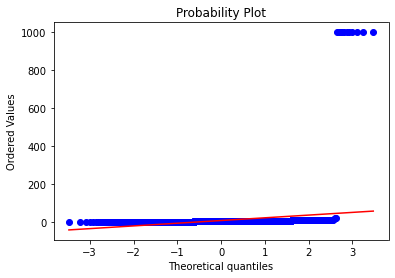

There exists outliers.


In [9]:
#Q-Q plot of attribute 'Coupon' from rocks versus mines data
import pylab
import scipy.stats as stats
stats.probplot(data['Coupon'],dist='norm',plot=pylab)
pylab.show()
print('There exists outliers.')

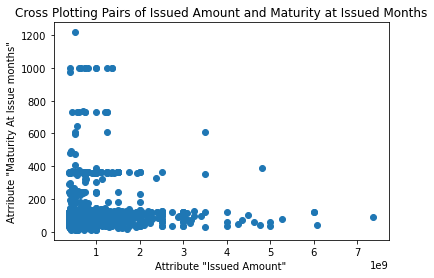

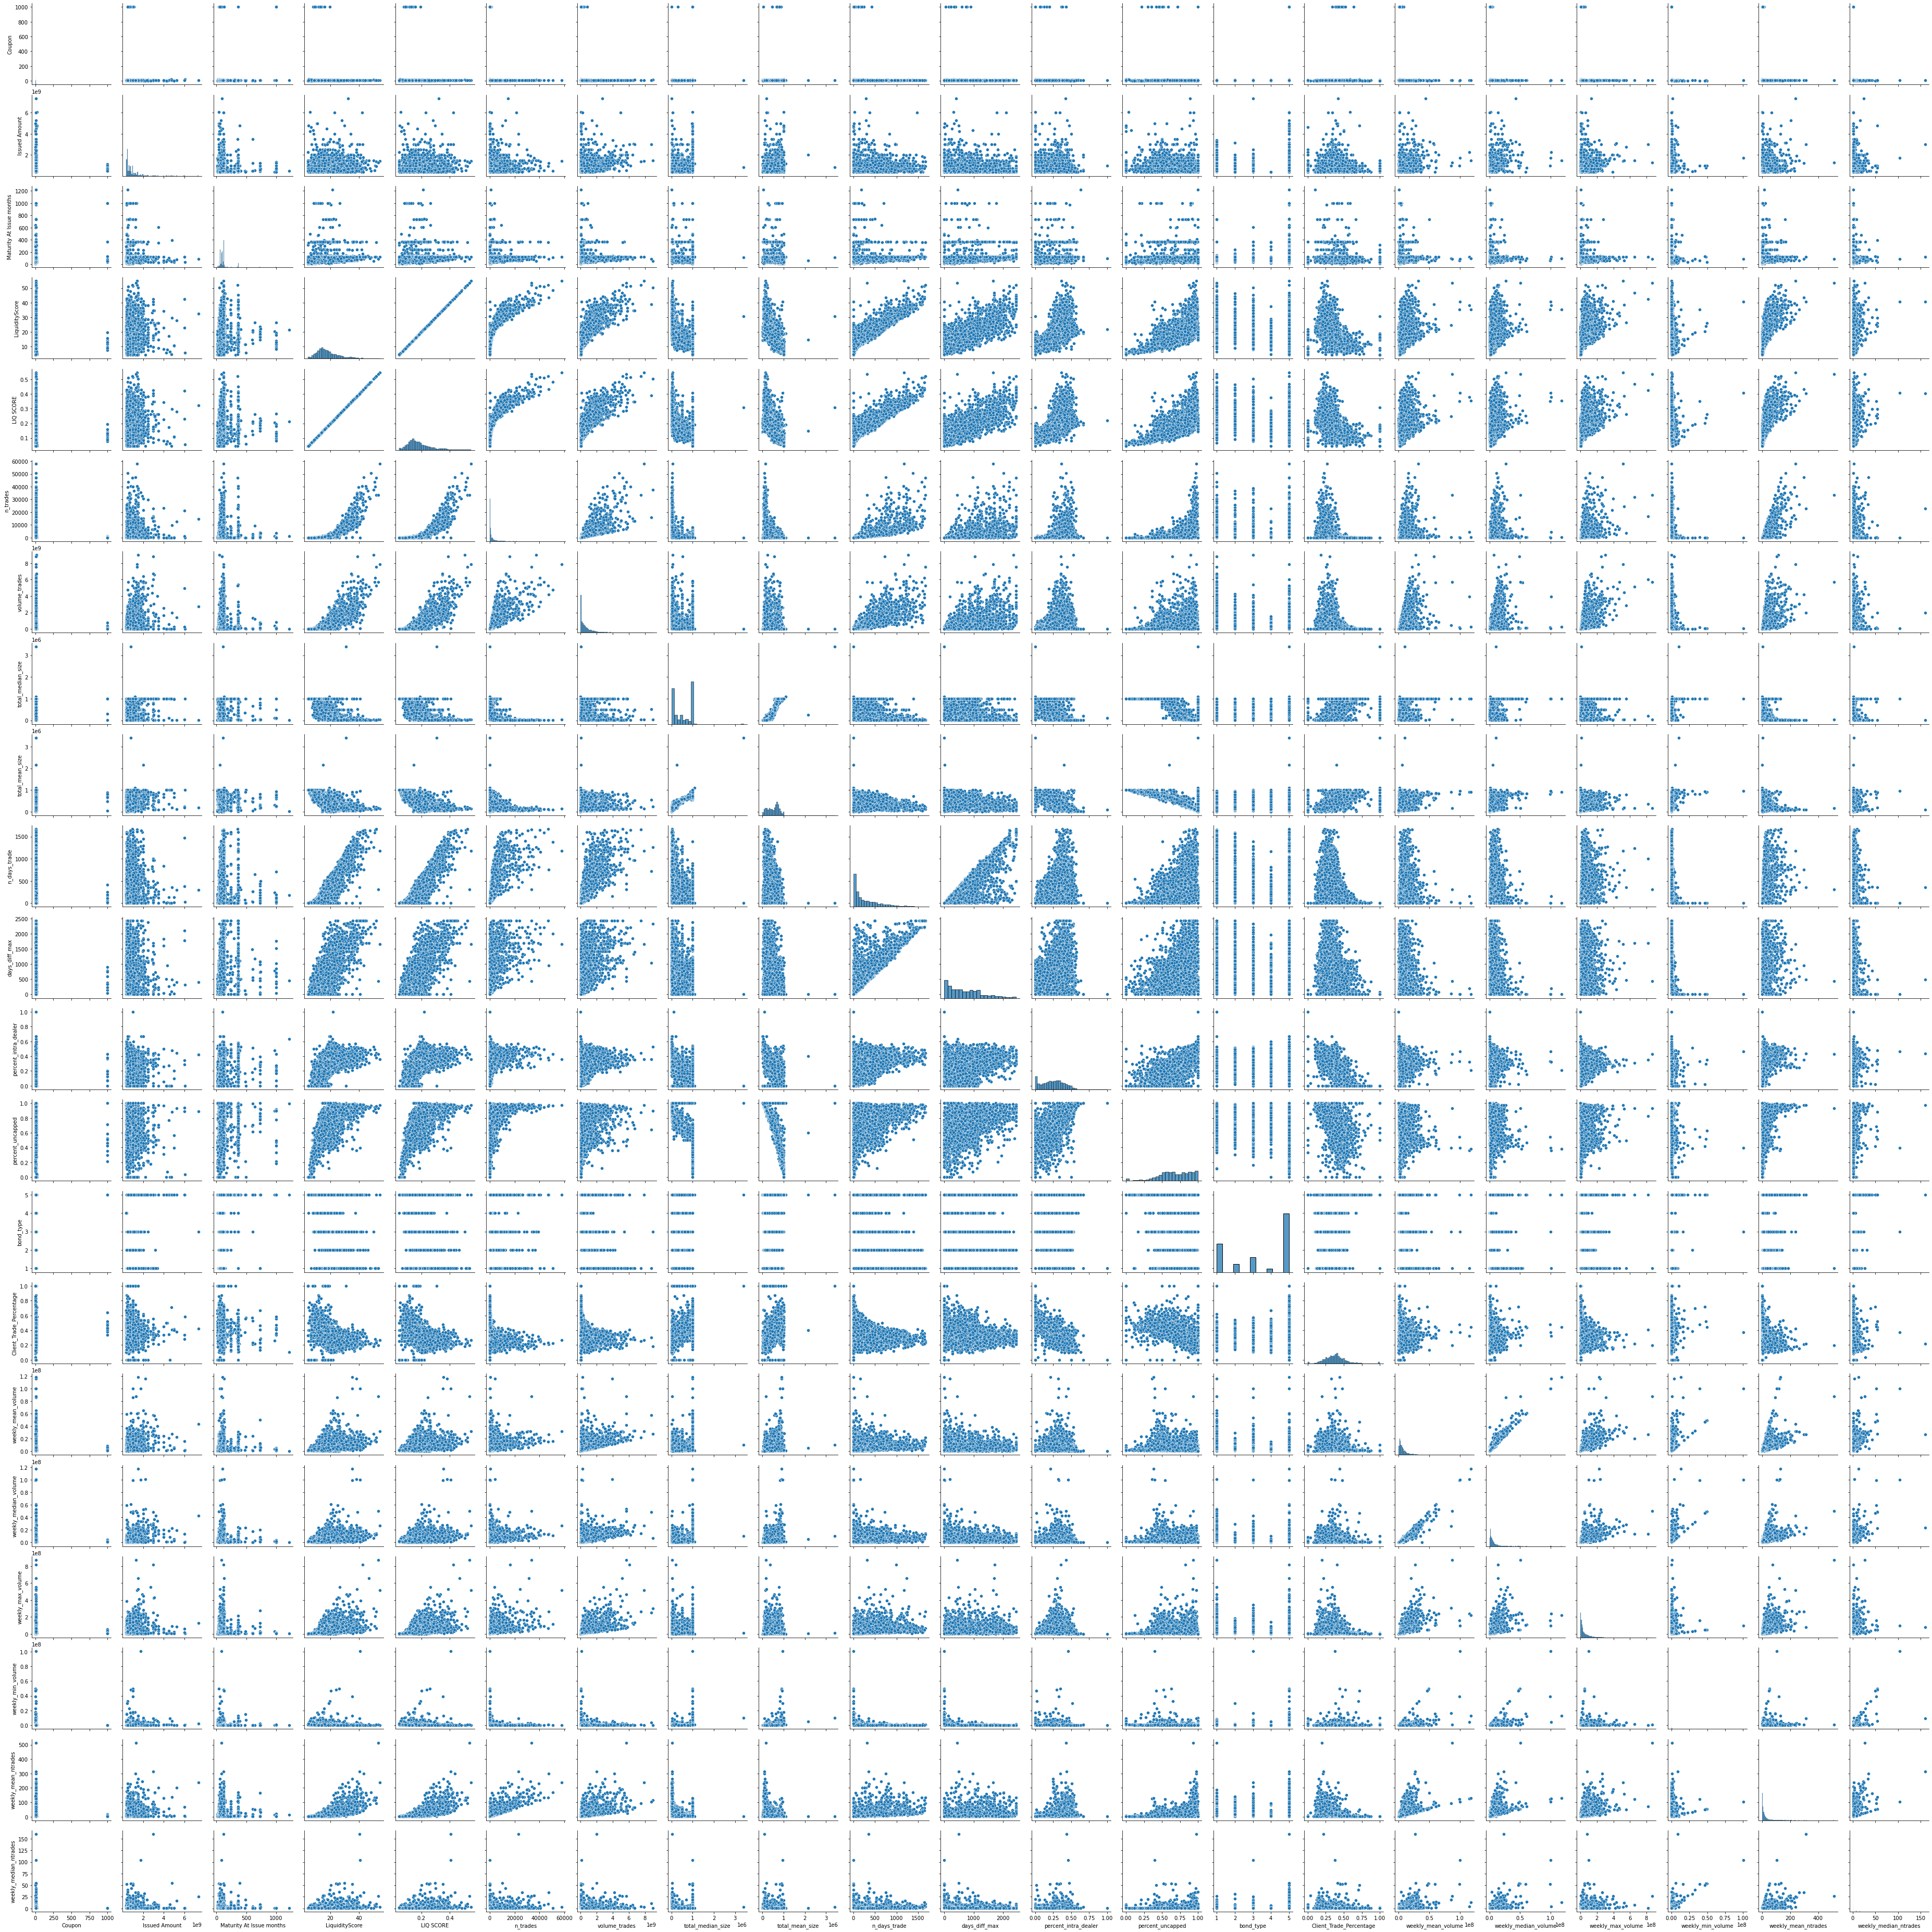

In [10]:
#Cross Plotting Pairs of Attributes
import seaborn
import matplotlib.pyplot as plt
dataCol1=data['Issued Amount']
dataCol2=data['Maturity At Issue months']

plt.scatter(dataCol1,dataCol2)
plt.xlabel('Attribute "Issued Amount"')
plt.ylabel('Atrribute "Maturity At Issue months"')
plt.title('Cross Plotting Pairs of Issued Amount and Maturity at Issued Months')
plt.show()

seaborn.pairplot(data)
plt.show()

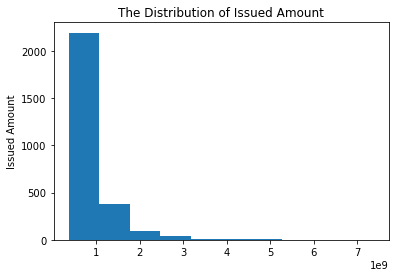

In [16]:
plt.hist(dataCol1)
plt.ylabel('Issued Amount')
plt.title('The Distribution of Issued Amount')
plt.show()

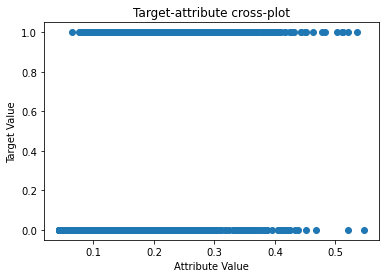

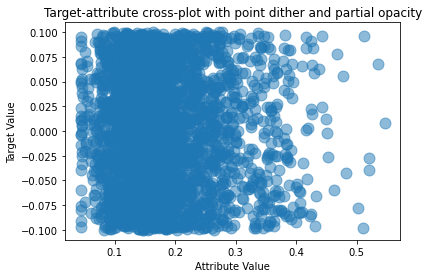

In [17]:
#Correlation between Classification Target and Real Attributes
from random import uniform
target = []

for i in range(nrow):
    if data['IN_ETF'][i] == 'Yes':
        target.append(1.0)
    else:
        target.append(0.0)
datacol = data['LIQ SCORE']
plt.scatter(datacol, target)
plt.xlabel("Attribute Value")
plt.ylabel("Target Value")
plt.title('Target-attribute cross-plot')
plt.show()

target=[]
for i in range(nrow):
    if data['IN_ETF'][i] == "True":
        target.append(1.0 + uniform(-0.1, 0.1))
    else:
        target.append(0.0 + uniform(-0.1, 0.1))
datacol = data['LIQ SCORE']
plt.scatter(datacol, target,alpha=0.5, s=120)
plt.xlabel("Attribute Value")
plt.ylabel("Target Value")
plt.title('Target-attribute cross-plot with point dither and partial opacity')
plt.show()

In [18]:
#Pearson’s Correlation Calculation 
import sys
from math import sqrt
Coupon_mean=0
Issued_mean=0
Volume_mean=0
for i in range(nrow):
    Coupon_mean += data['Coupon'][i]/nrow
    Issued_mean += data['Issued Amount'][i]/nrow
    Volume_mean += data['volume_trades'][i]/nrow

Coupon_var= data['Coupon'].var(axis=0)
Issued_var= data['Issued Amount'].var(axis=0)
Volume_var= data['volume_trades'].var(axis=0)

for i in range(nrow):
    Coupon_var +=(data['Coupon'][i] - Coupon_mean) * (data['Coupon'][i] - Coupon_mean)/nrow
    Issued_var += (data['Issued Amount'][i] -Issued_mean) * (data['Issued Amount'][i] - Issued_mean)/nrow
    Volume_var += (data['volume_trades'][i] - Volume_mean) * (data['volume_trades'][i]- Volume_mean)/nrow

corr_CI=0
corr_CV=0
for i in range(nrow):
    corr_CI += (data['Coupon'][i] - Coupon_mean) * (data['Issued Amount'][i] - Issued_mean) / (sqrt(Coupon_var*Issued_var) * nrow)
    corr_CV += (data['Coupon'][i] - Coupon_mean) * (data['volume_trades'][i] - Volume_mean) / (sqrt(Coupon_var*Volume_var) * nrow)

sys.stdout.write("Correlation between Coupon and Issued Amount ")
print(corr_CI)
sys.stdout.write(" \n")
sys.stdout.write("Correlation between Coupon and Volume trades ")
print(corr_CV)

Correlation between Coupon and Issued Amount -0.007117688433294682
 
Correlation between Coupon and Volume trades -0.013356083302639833


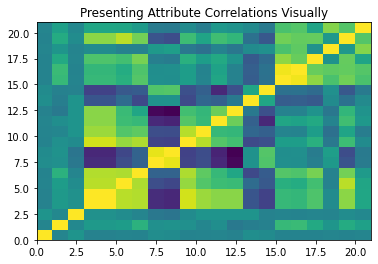

In [22]:
#Presenting Attribute Correlations Visually
corMat = DataFrame(data.corr())
plt.pcolor(corMat)
plt.title('Presenting Attribute Correlations Visually')
plt.show()

In [23]:
print("My name is Yuanqing Guo")
print("My NetID is: yg8")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Yuanqing Guo
My NetID is: yg8
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
